# Imports
---

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style
import time
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
from tqdm import tqdm

In [2]:
%matplotlib inline
style.use('seaborn')
rcParams['figure.figsize'] = [14,7]
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [18]:
api_key = ''

In [3]:
sp500 = pd.read_csv('S&P 500 Companies.csv')
sp500['CIK'] = sp500['CIK'].apply(lambda x: '{0:0>10}'.format(x))
sp500.iloc[81,0] = 'BF-B' # need to change BF.B to BF-B for AlphaVantage
sp500.head()

Symbol         Company Name             GICS Sector  \
0    MMM           3M Company             Industrials   
1    ABT  Abbott Laboratories             Health Care   
2   ABBV          AbbVie Inc.             Health Care   
3   ABMD          ABIOMED Inc             Health Care   
4    ACN        Accenture plc  Information Technology   

                GICS Sub Industry              HQ Location Date First Added  \
0        Industrial Conglomerates      St. Paul, Minnesota              NaN   
1           Health Care Equipment  North Chicago, Illinois        3/31/1964   
2                 Pharmaceuticals  North Chicago, Illinois       12/31/2012   
3           Health Care Equipment   Danvers, Massachusetts        5/31/2018   
4  IT Consulting & Other Services          Dublin, Ireland         7/6/2011   

          CIK  
0  0000066740  
1  0000001800  
2  0001551152  
3  0000815094  
4  0001467373

In [4]:
tickers = sp500.loc[:,'Symbol']
tickers

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [ ]:
# prices = []
# for ticker in sp500['Symbol']:
#     prices.append(web.DataReader(ticker, 'av-daily', api_key = api_key)) #receives daily, unadjusted stock prices
#     time.sleep(10) # can only make 5 API calls per minute, can do 10 seconds because API call takes 2-4 seconds

# data_dict = dict(zip(sp500['Symbol'], prices))

# for ticker, price_info in data_dict.items():
#     price_info.to_csv('S&P 500 Stock Prices CSV/'+ticker+'.csv')

In [ ]:
# for ticker, price_info in data_dict.items():
#     price_info.to_excel('S&P 500 Stock Prices Excel/'+ticker+'.xlsx')

---

In [5]:
# prices_adj = []
# for ticker in tqdm(sp500['Symbol']):
#     prices_adj.append(web.DataReader(ticker, 'av-daily-adjusted', api_key = api_key)) #receives daily, unadjusted stock prices
#     time.sleep(10) # can only make 5 API calls per minute

# data_dict_adj = dict(zip(sp500['Symbol'], prices_adj))

# for ticker, price_info in tqdm(data_dict_adj.items()):
#     price_info.to_csv('S&P 500 Stock Prices Adjusted CSV/'+ticker+'.csv')

100%|██████████| 505/505 [00:29<00:00, 17.00it/s]


---

In [5]:
prices = []
for ticker in tickers:
    prices.append(pd.read_csv('S&P 500 Stock Prices Adjusted CSV/'+ticker+'.csv', index_col = 0))

In [6]:
data_dict_adj = dict(zip(sp500['Symbol'], prices))

In [197]:
close_list = []
for k,v in data_dict_adj.items():
    close_list.append(v['adjusted close'])
close_prices = pd.DataFrame(close_list).T
close_prices.columns = sp500['Symbol']
close_prices.index = pd.to_datetime(close_prices.index)

In [198]:
returns = close_prices.pct_change()[1:]
returns.head()

Symbol           MMM       ABT  ABBV      ABMD  ACN      ATVI      ADBE  \
2000-01-19  0.017296 -0.020452   NaN -0.062500  NaN -0.014710 -0.013593   
2000-01-20 -0.037244 -0.030554   NaN -0.035897  NaN -0.056147  0.010769   
2000-01-21 -0.001997 -0.026833   NaN  0.252766  NaN -0.042995 -0.014574   
2000-01-24 -0.023068 -0.038154   NaN  0.065727  NaN -0.008616 -0.036894   
2000-01-25 -0.014768 -0.012321   NaN -0.083665  NaN -0.033345  0.040289   

Symbol           AMD  AAP       AES  ...  WYNN       XEL       XRX      XLNX  \
2000-01-19  0.004872  NaN  0.005645  ...   NaN  0.000000  0.007618 -0.055466   
2000-01-20 -0.004848  NaN -0.008801  ...   NaN -0.009084 -0.044519  0.023358   
2000-01-21 -0.028718  NaN  0.029733  ...   NaN  0.006111 -0.027252  0.011947   
2000-01-24 -0.089229  NaN  0.000000  ...   NaN -0.003037 -0.017172 -0.061975   
2000-01-25  0.159420  NaN -0.050000  ...   NaN -0.009651  0.008736  0.044947   

Symbol      XYL       YUM      ZBRA  ZBH      ZION  ZTS  
2000-01-19  NaN -0.037479 -0.006216  NaN  0.010794  NaN  
2000-01-20  NaN -0.054120  0.034808  NaN -0.017611  NaN  
2000-01-21  NaN  0.002204  0.026605  NaN  0.008390  NaN  
2000-01-24  NaN -0.021650  0.002868  NaN -0.016641  NaN  
2000-01-25  NaN -0.025969 -0.015385  NaN  0.032500  NaN  

[5 rows x 505 columns]

In [8]:
sectors = sp500['GICS Sector'].unique()
sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

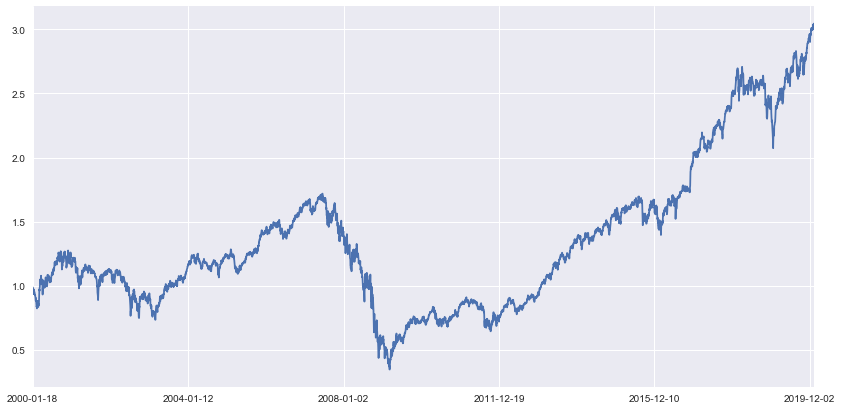

In [9]:
financials = sp500[sp500['GICS Sector']=='Financials'].loc[:,'Symbol'].values
temp = close_prices.loc[:,financials].fillna(0).sum(axis = 1)
temp = temp / temp.shift()
temp.cumprod().plot();

In [54]:
sector_returns_cumul = []
sector_prices = []
for sector in sectors:
    sector_names = sp500[sp500['GICS Sector']==sector].loc[:,'Symbol'].values
    temp = close_prices.loc[:,sector_names].fillna(0).sum(axis = 1)
    sector_prices.append(temp)
    temp = (temp / temp.shift()).cumprod()
    temp.dropna(inplace = True)
    sector_returns_cumul.append(temp)

In [55]:
sector_prices = pd.DataFrame(sector_prices).T
sector_prices.columns = sectors
sector_prices.index = pd.to_datetime(sector_prices.index)
# sector_prices.head()

In [57]:
sector_returns = sector_prices.pct_change().dropna()

In [56]:
sector_returns_cumul = pd.DataFrame(sector_returns_cumul).T
sector_returns_cumul.columns = sectors
sector_returns_cumul.index = pd.to_datetime(sector_returns_cumul.index)
sector_returns_cumul

Industrials  Health Care  Information Technology  \
2000-01-19     0.997581     1.008957                1.011257   
2000-01-20     0.981348     1.001461                1.029458   
2000-01-21     0.977380     1.025568                1.060744   
2000-01-24     0.955127     0.994160                1.023579   
2000-01-25     0.942568     0.989757                1.049136   
...                 ...          ...                     ...   
2020-01-06    11.283544    12.312681                5.278945   
2020-01-07    11.282458    12.294323                5.298317   
2020-01-08    11.321126    12.387300                5.334520   
2020-01-09    11.398697    12.462709                5.375610   
2020-01-10    11.373988    12.534923                5.368092   

            Communication Services  Consumer Discretionary  Utilities  \
2000-01-19                1.007780                1.025556   1.012876   
2000-01-20                0.993558                1.012196   1.012697   
2000-01-21                0.985363                1.006646   1.036075   
2000-01-24                0.972645                0.978745   1.039833   
2000-01-25                0.978187                0.992149   1.013986   
...                            ...                     ...        ...   
2020-01-06               21.870914               13.956305   8.454204   
2020-01-07               21.852333               13.964553   8.440018   
2020-01-08               22.023518               13.950778   8.438040   
2020-01-09               22.181076               13.955327   8.485534   
2020-01-10               22.239946               13.968527   8.516782   

            Financials  Materials  Real Estate  Consumer Staples    Energy  
2000-01-19    0.986396   0.982087     0.999935          0.995291  1.005306  
2000-01-20    0.969481   0.953725     1.004365          0.982574  0.996422  
2000-01-21    0.953217   0.951073     1.014244          0.966360  1.024084  
2000-01-24    0.935740   0.940588     1.017581          0.935339  1.000831  
2000-01-25    0.941861   0.927251     1.018387          0.933281  0.995789  
...                ...        ...          ...               ...       ...  
2020-01-06    3.011916   9.320933    13.519345          6.788982  7.826759  
2020-01-07    3.001680   9.296017    13.355018          6.733563  7.862410  
2020-01-08    3.012926   9.343777    13.414346          6.770677  7.694438  
2020-01-09    3.043300   9.377861    13.435654          6.806309  7.754219  
2020-01-10    3.030217   9.388746    13.557175          6.821405  7.727745  

[5027 rows x 11 columns]

In [53]:
sector_returns_cumul.T.iplot(kind = 'scatter')

Notice that Communication Services has the highest cumulative returns due to reclassification of Google, Facebook, etc... from Tech to Communication around 2018. Would need to adjust reclassification of company sectors in order to get accurate measure, but I do not have the data.

In [14]:
sp500[sp500['GICS Sector']=='Communication Services'].loc[:,'Symbol'].values

array(['ATVI', 'GOOGL', 'GOOG', 'T', 'CTL', 'CHTR', 'CMCSA', 'DISCA',
       'DISCK', 'DISH', 'EA', 'FB', 'FOXA', 'FOX', 'IPG', 'LYV', 'NFLX',
       'NWSA', 'NWS', 'OMC', 'TMUS', 'TTWO', 'TWTR', 'VZ', 'VIAC', 'DIS'],
      dtype=object)

In [16]:
# SPY = web.DataReader('SPY', 'av-daily-adjusted', start = '2000-01-18', end = '2020-01-10', api_key = api_key)
SPY = pd.read_csv('S&P 500 Stock Prices Adjusted CSV/SPY.csv', index_col = 0, header = 0)
SPY.index = pd.to_datetime(SPY.index)
SPY.head()

open      high       low     close  adjusted close   volume  \
2000-01-18  145.3437  146.6250  145.1875  145.8125        100.2184  6488500   
2000-01-19  145.3125  147.0000  145.0000  147.0000        101.0346  6157900   
2000-01-20  146.9687  146.9687  143.8125  144.7500         99.4882  5800100   
2000-01-21  145.5000  145.5000  144.0625  144.4375         99.2734  6244800   
2000-01-24  145.6562  145.8437  139.4062  140.3437         96.4597  7896900   

            dividend amount  split coefficient  
2000-01-18              0.0                1.0  
2000-01-19              0.0                1.0  
2000-01-20              0.0                1.0  
2000-01-21              0.0                1.0  
2000-01-24              0.0                1.0

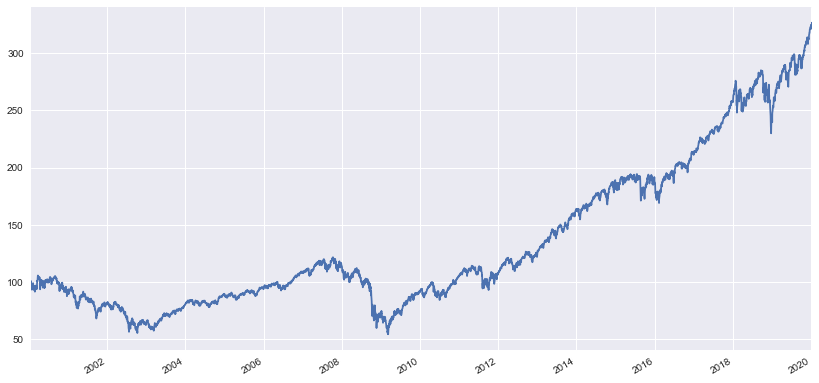

In [17]:
SPY['adjusted close'].plot();

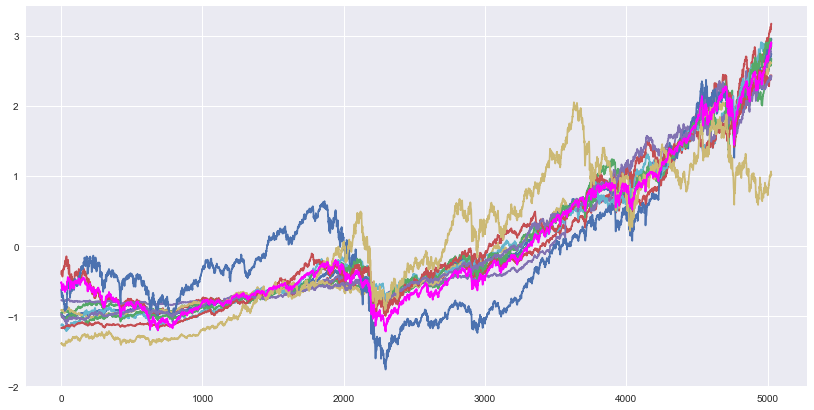

In [20]:
fig, ax = plt.subplots()

sectors_normed = (sector_prices - sector_prices.mean()) / sector_prices.std()
spy_normed = (SPY['adjusted close'] - SPY['adjusted close'].mean()) / SPY['adjusted close'].std()

ax.plot(sectors_normed.values)
ax.plot(spy_normed.values, color = 'magenta')

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
sector_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2000-01-18 to 2020-01-10
Data columns (total 11 columns):
Industrials               5028 non-null float64
Health Care               5028 non-null float64
Information Technology    5028 non-null float64
Communication Services    5028 non-null float64
Consumer Discretionary    5028 non-null float64
Utilities                 5028 non-null float64
Financials                5028 non-null float64
Materials                 5028 non-null float64
Real Estate               5028 non-null float64
Consumer Staples          5028 non-null float64
Energy                    5028 non-null float64
dtypes: float64(11)
memory usage: 471.4 KB


In [23]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2000-01-18 to 2020-01-10
Data columns (total 8 columns):
open                 5028 non-null float64
high                 5028 non-null float64
low                  5028 non-null float64
close                5028 non-null float64
adjusted close       5028 non-null float64
volume               5028 non-null int64
dividend amount      5028 non-null float64
split coefficient    5028 non-null float64
dtypes: float64(7), int64(1)
memory usage: 353.5 KB


In [226]:
sector_betas_ = []
for sector in sectors:
    X = sector_prices[sector].pct_change().dropna()
    y = SPY['adjusted close'].pct_change().dropna().loc[X.index]
    X = np.reshape(X.values, (len(X), 1))
    y = np.reshape(y.values, (len(X), 1))
    reg = LinearRegression().fit(X, y)
    sector_betas_.append([sector, float(reg.coef_)])
sector_betas = pd.DataFrame(sector_betas_, columns = ['Sectors', 'Betas']).set_index(['Sectors'])
sector_betas

Betas
Sectors                         
Industrials             0.814690
Health Care             0.792295
Information Technology  0.543671
Communication Services  0.536302
Consumer Discretionary  0.614736
Utilities               0.620026
Financials              0.610668
Materials               0.674395
Real Estate             0.511982
Consumer Staples        0.977746
Energy                  0.426441

In [189]:
returns.head()

Symbol           MMM       ABT  ABBV      ABMD  ACN      ATVI      ADBE  \
2000-01-19  0.017296 -0.020452   NaN -0.062500  NaN -0.014710 -0.013593   
2000-01-20 -0.037244 -0.030554   NaN -0.035897  NaN -0.056147  0.010769   
2000-01-21 -0.001997 -0.026833   NaN  0.252766  NaN -0.042995 -0.014574   
2000-01-24 -0.023068 -0.038154   NaN  0.065727  NaN -0.008616 -0.036894   
2000-01-25 -0.014768 -0.012321   NaN -0.083665  NaN -0.033345  0.040289   

Symbol           AMD  AAP       AES  ...  WYNN       XEL       XRX      XLNX  \
2000-01-19  0.004872  NaN  0.005645  ...   NaN  0.000000  0.007618 -0.055466   
2000-01-20 -0.004848  NaN -0.008801  ...   NaN -0.009084 -0.044519  0.023358   
2000-01-21 -0.028718  NaN  0.029733  ...   NaN  0.006111 -0.027252  0.011947   
2000-01-24 -0.089229  NaN  0.000000  ...   NaN -0.003037 -0.017172 -0.061975   
2000-01-25  0.159420  NaN -0.050000  ...   NaN -0.009651  0.008736  0.044947   

Symbol      XYL       YUM      ZBRA  ZBH      ZION  ZTS  
2000-01-19  NaN -0.037479 -0.006216  NaN  0.010794  NaN  
2000-01-20  NaN -0.054120  0.034808  NaN -0.017611  NaN  
2000-01-21  NaN  0.002204  0.026605  NaN  0.008390  NaN  
2000-01-24  NaN -0.021650  0.002868  NaN -0.016641  NaN  
2000-01-25  NaN -0.025969 -0.015385  NaN  0.032500  NaN  

[5 rows x 505 columns]

In [221]:
stock_betas_ = []
for ticker in returns.columns:
    X = returns[ticker].dropna()
    y = SPY['adjusted close'].pct_change().dropna().loc[X.index]
    X = np.reshape(X.values, (len(X), 1))
    y = np.reshape(y.values, (len(X), 1))
    reg = LinearRegression().fit(X, y)
    stock_betas_.append([ticker, float(reg.coef_)])
stock_betas = pd.DataFrame(stock_betas_, columns = ['Tickers', 'Betas']).set_index(['Tickers'])
stock_betas

Betas
Tickers          
MMM      0.551621
ABT      0.383596
ABBV     0.235904
ABMD     0.118805
ACN      0.345556
...           ...
YUM      0.343591
ZBRA     0.211544
ZBH      0.352896
ZION     0.229361
ZTS      0.308151

[505 rows x 1 columns]

In [228]:
stock_betas.sort_values('Betas', ascending = False).head(10)

Betas
Tickers          
CPRI     0.109355
ALGN     0.106107
NFLX     0.103476
UA       0.097174
COTY     0.088327
NEM      0.087737
EVRG     0.083946
TWTR     0.073097
VIAC     0.066915
EQIX     0.000617

In [229]:
stock_betas.sort_values('Betas', ascending = False).tail(10)

Betas
Tickers          
CPRI     0.109355
ALGN     0.106107
NFLX     0.103476
UA       0.097174
COTY     0.088327
NEM      0.087737
EVRG     0.083946
TWTR     0.073097
VIAC     0.066915
EQIX     0.000617

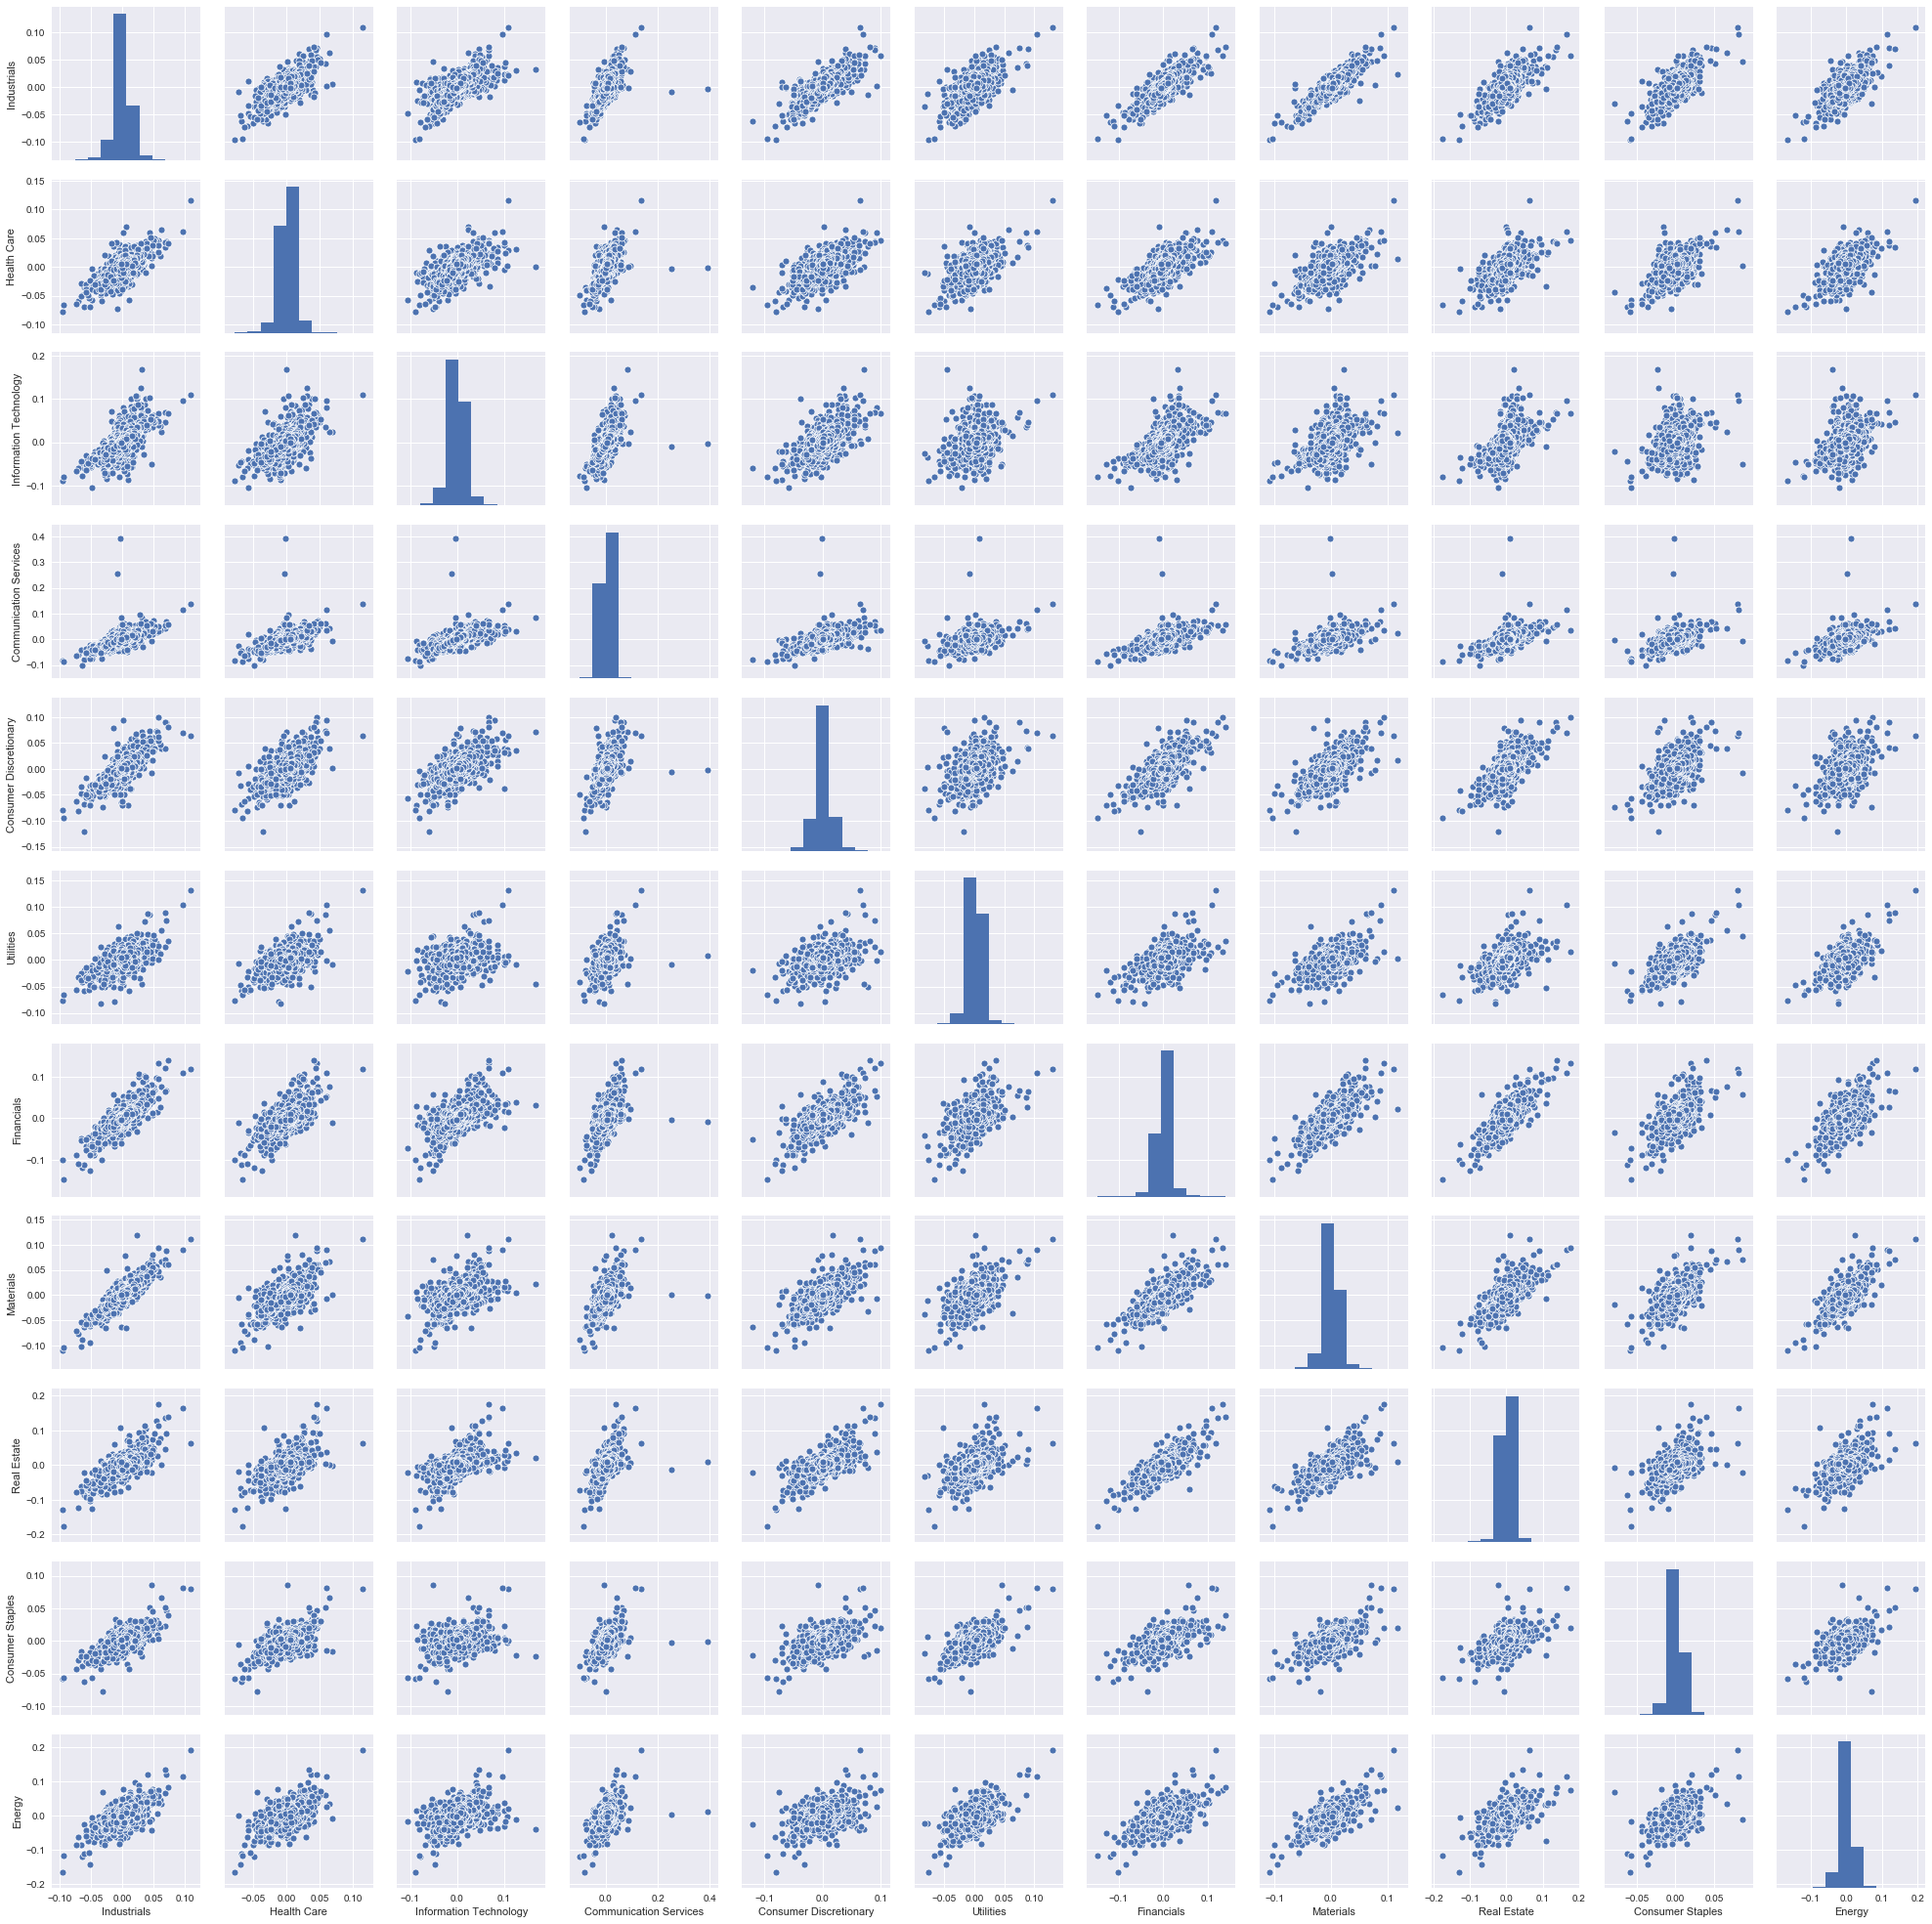

In [58]:
sns.pairplot(sector_returns)

In [59]:
sector_returns.corr()

Industrials  Health Care  Information Technology  \
Industrials                1.000000     0.749567                0.725601   
Health Care                0.749567     1.000000                0.684081   
Information Technology     0.725601     0.684081                1.000000   
Communication Services     0.666766     0.610415                0.659689   
Consumer Discretionary     0.781760     0.664001                0.687299   
Utilities                  0.550889     0.486270                0.362783   
Financials                 0.819252     0.681607                0.643389   
Materials                  0.863711     0.661514                0.600673   
Real Estate                0.687742     0.567261                0.546579   
Consumer Staples           0.708995     0.633057                0.460142   
Energy                     0.651589     0.538441                0.457014   

                        Communication Services  Consumer Discretionary  \
Industrials                           0.666766                0.781760   
Health Care                           0.610415                0.664001   
Information Technology                0.659689                0.687299   
Communication Services                1.000000                0.612485   
Consumer Discretionary                0.612485                1.000000   
Utilities                             0.398709                0.415320   
Financials                            0.616547                0.721306   
Materials                             0.590263                0.696986   
Real Estate                           0.521877                0.648571   
Consumer Staples                      0.504492                0.603679   
Energy                                0.471224                0.470285   

                        Utilities  Financials  Materials  Real Estate  \
Industrials              0.550889    0.819252   0.863711     0.687742   
Health Care              0.486270    0.681607   0.661514     0.567261   
Information Technology   0.362783    0.643389   0.600673     0.546579   
Communication Services   0.398709    0.616547   0.590263     0.521877   
Consumer Discretionary   0.415320    0.721306   0.696986     0.648571   
Utilities                1.000000    0.501752   0.519023     0.507818   
Financials               0.501752    1.000000   0.736824     0.728036   
Materials                0.519023    0.736824   1.000000     0.642316   
Real Estate              0.507818    0.728036   0.642316     1.000000   
Consumer Staples         0.613060    0.646220   0.654454     0.540370   
Energy                   0.494134    0.553008   0.683693     0.479889   

                        Consumer Staples    Energy  
Industrials                     0.708995  0.651589  
Health Care                     0.633057  0.538441  
Information Technology          0.460142  0.457014  
Communication Services          0.504492  0.471224  
Consumer Discretionary          0.603679  0.470285  
Utilities                       0.613060  0.494134  
Financials                      0.646220  0.553008  
Materials                       0.654454  0.683693  
Real Estate                     0.540370  0.479889  
Consumer Staples                1.000000  0.457134  
Energy                          0.457134  1.000000

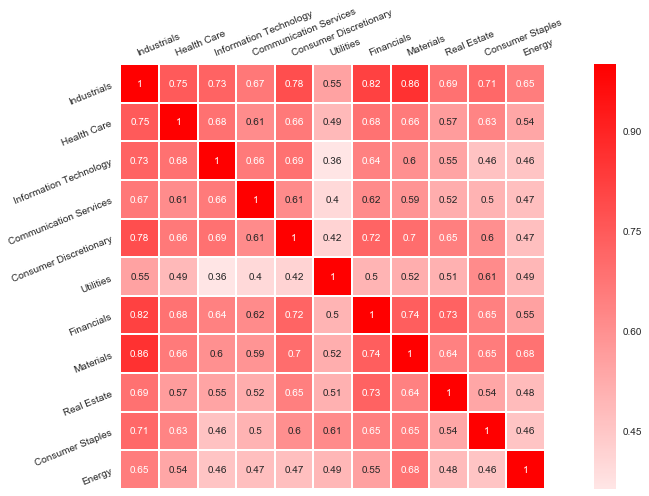

In [98]:
temp = sector_returns.corr()
# columns = ['Industrials', 'Health Care', 'Tech', 'Comms', 'Consumer', 'Utilities', 'Financials', 'Materials', 'Real Estate', 'Consumer', 'Energy']
corr_ = pd.DataFrame(np.rot90(temp), columns = temp.columns, index = temp.columns[::-1]) # accounts for seaborn rotating the matrix
ax = sns.heatmap(corr_, cmap = sns.light_palette('red', as_cmap = True), linewidths = 1.0, square = True, annot = True)
ax.xaxis.set_ticks_position('top')
plt.xticks(ticks = np.arange(0.4, len(corr_.columns), 1.0), rotation = 22.5, ha = 'left')
# fixes a current matplotlib issue when plotting seaborn heatmaps, top and bottom row are cut off
plt.ylim(0.0, len(corr_.columns))
plt.yticks(ticks = np.arange(0.5, len(corr_.columns), 1.0), rotation = 22.25)
plt.tight_layout()

In [106]:
cpi = pd.read_csv('Gov Data/CPI.csv', index_col = 0)
cpi.index = pd.to_datetime(cpi.index)
cpi.head()

CPIAUCNS
DATE                
1913-01-01       9.8
1913-02-01       9.8
1913-03-01       9.8
1913-04-01       9.8
1913-05-01       9.7

In [107]:
gdp = pd.read_csv('Gov Data/RealGDP.csv', index_col = 0)
gdp.index = pd.to_datetime(gdp.index)
gdp.head()

GDPC1
DATE                
1947-01-01  2033.061
1947-04-01  2027.639
1947-07-01  2023.452
1947-10-01  2055.103
1948-01-01  2086.017

In [108]:
fedfunds = pd.read_csv('Gov Data/FedFunds.csv', index_col = 0)
fedfunds.index = pd.to_datetime(fedfunds.index)
fedfunds.head()

DFF
DATE            
1954-07-01  1.13
1954-07-02  1.25
1954-07-03  1.25
1954-07-04  1.25
1954-07-05  0.88

In [109]:
unem_rate = pd.read_csv('Gov Data/UnemploymentRate.csv', index_col = 0) / 100
unem_rate.index = pd.to_datetime(unem_rate.index)
unem_rate.head()

UNRATE
DATE              
1948-01-01   0.034
1948-02-01   0.038
1948-03-01   0.040
1948-04-01   0.039
1948-05-01   0.035

In [137]:
gov_data = fedfunds.join(cpi).join(gdp).join(unem_rate).dropna()
gov_data.columns = ['Fed Funds', 'CPI', 'Real GDP', 'Unemployment Rate']
gov_data.head()

Fed Funds   CPI  Real GDP  Unemployment Rate
DATE                                                    
1954-07-01       1.13  26.9  2682.601              0.058
1954-10-01       0.50  26.8  2735.091              0.057
1955-01-01       1.44  26.7  2813.212              0.049
1955-04-01       1.44  26.7  2858.988              0.047
1955-07-01       1.69  26.8  2897.598              0.040

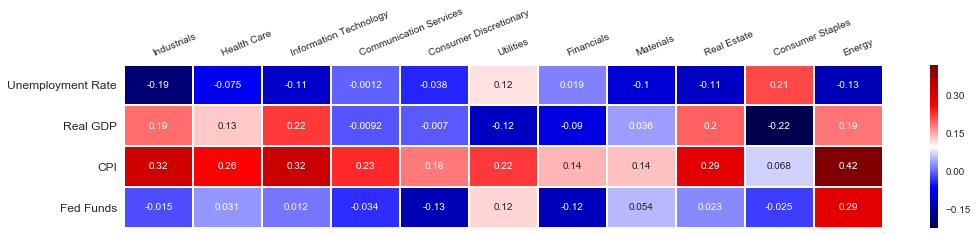

In [138]:
temp = sector_returns.join(gov_data.pct_change()).dropna().corr().iloc[-4:,:-4]
plt.figure(figsize = (17,3))
ax = sns.heatmap(temp, cmap = 'seismic', annot = True, linewidths = 1.0)
ax.xaxis.set_ticks_position('top')
plt.xticks(ticks = np.arange(0.4, len(temp.columns), 1.0), rotation = 22.5, ha = 'left')
plt.yticks(rotation = 0, fontsize = 12)
plt.ylim(0.0, len(temp.index));

In [186]:
sorted_returns = (returns.fillna(0.0) + 1).cumprod().T.sort_values(by = '2020-01-10', ascending = False)
highest_returns = sorted_returns.iloc[:10, :]
highest_returns

2000-01-19  2000-01-20  2000-01-21  2000-01-24  2000-01-25  \
Symbol                                                               
MNST      0.971460    0.993414    0.971460    0.971460    1.000000   
NFLX      1.000000    1.000000    1.000000    1.000000    1.000000   
ODFL      1.031671    1.062444    1.031671    1.052443    1.046673   
HFC       0.995628    0.991256    1.014036    1.014036    1.014036   
ANSS      0.993681    1.037432    1.062588    1.094788    1.125981   
TSCO      0.955221    0.980714    0.949568    0.922190    0.910995   
ISRG      1.000000    1.000000    1.000000    1.000000    1.000000   
AAPL      1.025204    1.091962    1.070907    1.022232    1.079948   
ROST      0.956294    1.017154    1.049189    0.980497    0.980497   
KMX       1.000000    0.719000    0.781500    0.781500    0.781500   

        2000-01-26  2000-01-27  2000-01-28  2000-01-31  2000-02-01  ...  \
Symbol                                                              ...   
MNST      1.043908    0.986828    1.000000    1.028540    1.015368  ...   
NFLX      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
ODFL      1.052443    1.052443    1.062444    0.989999    0.989999  ...   
HFC       1.014036    1.009664    1.014036    0.995628    1.004372  ...   
ANSS      1.106863    1.081707    1.031395    1.031395    1.069632  ...   
TSCO      0.934050    1.062292    1.027378    1.120816    1.097761  ...   
ISRG      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
AAPL      1.060131    1.058304    0.977675    0.998173    0.964485  ...   
ROST      1.029686    1.010104    1.005483    0.995300    0.990601  ...   
KMX       0.781500    0.781500    0.750000    0.781500    0.844000  ...   

        2019-12-27  2019-12-30  2019-12-31  2020-01-02  2020-01-03  \
Symbol                                                               
MNST    697.804610  695.499451  697.585071  699.231614  694.621295   
NFLX    275.066867  270.235707  270.453026  275.668673  272.400535   
ODFL    121.124503  120.797538  121.669445  123.111937  121.643800   
HFC     117.303267  114.657156  116.682006  118.246664  110.860561   
ANSS    104.117529  103.360837  103.606359  104.483800  103.429261   
TSCO    102.305476  102.970517  103.569053  103.203281  101.928619   
ISRG     98.335526   97.256579   97.228618   98.233553   97.588816   
AAPL     89.732475   90.265048   90.924573   92.999133   92.094996   
ROST     90.044646   91.250881   91.188220   91.509360   91.532858   
KMX      88.400000   87.430000   87.670000   89.510000   87.260000   

        2020-01-06  2020-01-07  2020-01-08  2020-01-09  2020-01-10  
Symbol                                                              
MNST    695.718990  699.121844  700.548847  705.268935  719.319429  
NFLX    280.700435  276.454363  283.567369  280.558342  275.585089  
ODFL    120.682139  121.028337  121.598923  124.387742  126.496987  
HFC     110.446387  111.251726  109.779107  110.814542  111.780948  
ANSS    102.471322  103.308513  103.735158  105.224391  105.244516  
TSCO    101.585014   99.767236  101.651519  100.653957  101.030814  
ISRG     97.986842   95.855263   95.687500   96.347039   98.947368  
AAPL     92.828833   92.392247   93.878499   95.872554   96.153084  
ROST     91.979322   93.052401   93.326545   95.660688   94.869586  
KMX      87.050000   87.230000   87.080000   87.600000   89.550000  

[10 rows x 5027 columns]

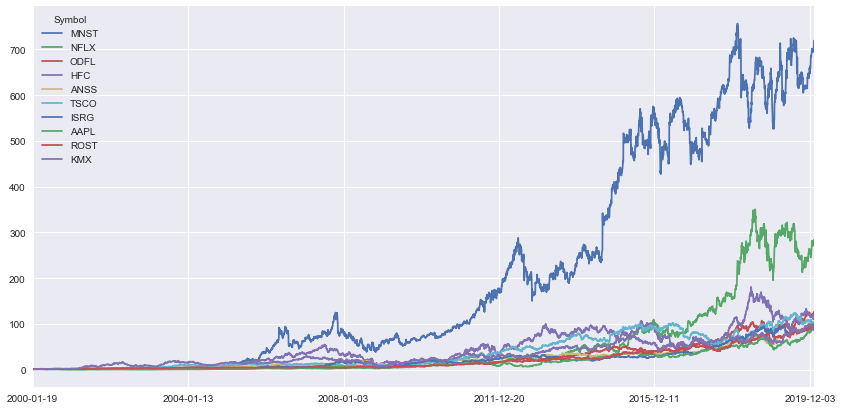

In [167]:
highest_returns.T.plot()

In [185]:
sp500[sp500['Symbol'].isin(list(highest_returns.index))].loc[:,['Symbol', 'Company Name']]

Symbol               Company Name
42    ANSS                      ANSYS
48    AAPL                 Apple Inc.
89     KMX                 Carmax Inc
235    HFC         HollyFrontier Corp
259   ISRG    Intuitive Surgical Inc.
327   MNST           Monster Beverage
337   NFLX               Netflix Inc.
359   ODFL  Old Dominion Freight Line
407   ROST                Ross Stores
446   TSCO     Tractor Supply Company